In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import ect 
import time

import os

n = int(sys.argv[1])
nrun = int(sys.argv[2])

dt_naive = np.zeros(N)
dt_ecs = np.zeros(N)

for i in range(nrun):
    # same number of nodes and edges
    G = ect.random_graph(n, n)

    # compute all angles to take ECT on manually (not part of run time)
    unique_angles = sorted(list(ect.critical_angles(G)))
    thetas = ect.angular_midpoint(unique_angles)

    t0 = time.time()
    ect.ect(G, thetas, n)
    tf = time.time()
    dt_naive[i] = (tf-t0)

    t0 = time.time()
    ect.ecs_map(G)
    tf = time.time()
    dt_ecs[i] = (tf-t0)
    
np.save(f"naive_ect_timing_{N}_{nrun}", dt_naive)
np.save(f"ecs_ect_timing_{N}_{nrun}", dt_naive)

In [36]:
N = 40
G = ect.random_graph(N)
L = []
for i in range(100):
    t0 = time.time()
    ect.ecs_map(G)
    tf = time.time()
    T = (tf-t0)
    
    thetas = np.linspace(0,2*np.pi,i, endpoint=False)
    t0 = time.time()
    ect.ect(G, thetas, N)
    tf = time.time()
    L.append(tf-t0)
plt.plot(L, 'r')
plt.axhline(T, color = 'blue', ls = '--')

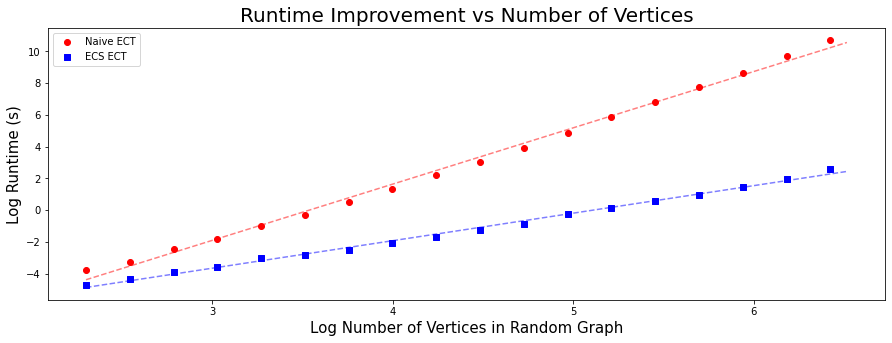

In [56]:
fig = plt.figure(figsize = (15,5))

plt.scatter(np.log(N[:18]), np.log(naive), color = 'red', label = 'Naive ECT')
plt.scatter(np.log(N[:18]), np.log(ecs), marker = 's', color = 'blue', label = 'ECS ECT')
P1 = np.polyfit(np.log(N[:18]), np.log(ecs), deg = 1)
P2 = np.polyfit(np.log(N[:18]), np.log(naive), deg = 1)

xx = np.log(np.linspace(min(N), 675, 1000))
yy1 = P1[0]*xx + P1[1]
yy2 = P2[0]*xx + P2[1]
plt.plot(xx,yy1, color = 'blue', alpha = 0.5, ls = '--')
plt.plot(xx,yy2, color = 'red', alpha = 0.5, ls = '--')

plt.ylabel('Log Runtime (s)', size = 15)
plt.xlabel('Log Number of Vertices in Random Graph', size = 15)
plt.title("Runtime Improvement vs Number of Vertices", size = 20)

plt.legend()
plt.savefig("./plots/runtime_comparison.pdf")

In [5]:
naive = np.load('./data/naive_timing.npy')
ecs = np.load('./data/ecs_timing.npy')

# Here starts the actual plots I'll use for the paper

## N = 10

In [5]:
# precomputation
N = 10
G = ect.random_graph(N)

# compute all angles to take ECT on manually (not part of run time)
unique_angles = sorted(list(ect.critical_angles(G)))
thetas = ect.angular_midpoint(unique_angles)

In [6]:
%%timeit 

ect.ecs_map(G)

8.81 ms ± 787 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [9]:
%%timeit 
# choose n as threshold number-- not the SAME thresholds as ecs.. just the same amount.
ect.ect(G, thetas, N)

29 ms ± 1.35 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## N = 100

In [10]:
# precomputation
N = 100
G = ect.random_graph(N)

# compute all angles to take ECT on manually (not part of run time)
unique_angles = sorted(list(ect.critical_angles(G)))
thetas = ect.angular_midpoint(unique_angles)

In [11]:
%%timeit 

ect.ecs_map(G)

1.58 s ± 59.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [12]:
%%timeit 
# choose n as threshold number-- not the SAME thresholds as ecs.. just the same amount.
ect.ect(G, thetas, N)

1min 9s ± 2.01 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


# N = 1000

In [11]:
# precomputation
N = 500
G = ect.random_graph(N)

# compute all angles to take ECT on manually (not part of run time)
unique_angles = sorted(list(ect.critical_angles(G)))
thetas = ect.angular_midpoint(unique_angles)

In [12]:
%%time

ect.ecs_map(G)

CPU times: user 39.7 s, sys: 783 ms, total: 40.5 s
Wall time: 40.8 s


{6.283151290418426: array([ 1.000e+00,  2.000e+00,  3.000e+00,  4.000e+00,  5.000e+00,
         6.000e+00,  7.000e+00,  7.000e+00,  8.000e+00,  9.000e+00,
         1.000e+01,  1.100e+01,  1.100e+01,  1.100e+01,  1.200e+01,
         1.300e+01,  1.400e+01,  1.500e+01,  1.600e+01,  1.700e+01,
         1.700e+01,  1.800e+01,  1.800e+01,  1.900e+01,  2.000e+01,
         2.100e+01,  2.100e+01,  2.200e+01,  2.300e+01,  2.400e+01,
         2.400e+01,  2.400e+01,  2.500e+01,  2.500e+01,  2.600e+01,
         2.700e+01,  2.800e+01,  2.800e+01,  2.900e+01,  3.000e+01,
         3.000e+01,  3.100e+01,  3.200e+01,  3.200e+01,  3.100e+01,
         3.100e+01,  3.000e+01,  3.000e+01,  3.000e+01,  3.100e+01,
         3.100e+01,  3.200e+01,  3.200e+01,  3.300e+01,  3.400e+01,
         3.400e+01,  3.500e+01,  3.600e+01,  3.500e+01,  3.500e+01,
         3.600e+01,  3.700e+01,  3.800e+01,  3.900e+01,  4.000e+01,
         4.100e+01,  4.100e+01,  4.000e+01,  4.100e+01,  4.100e+01,
         3.900e+01,  3.800e+0

In [56]:
equald = []
# n values to test at 
nrange = np.linspace(10,100,20,dtype = int)
for n in nrange:
    print(n)
    G = ect.random_graph(n)
    ECT_runtimes = []
    
    # get single runtime for ECS
    t0 = time.time()
    ect.ecs_map(G)
    tf = time.time()
    T = (tf-t0)
    
    # check varying number of directions to find closest time
    to_check = np.arange(2*n, 4*n)
    for d in to_check:
        thetas = np.linspace(0,2*np.pi,d, endpoint=False)
        t0 = time.time()
        ect.ect(G, thetas, n)
        tf = time.time()
        ECT_runtimes.append(tf-t0)
    ECT_runtimes = np.array(ECT_runtimes)
    
    if np.argmin(np.abs(ECT_runtimes-T)) == len(ECT_runtimes)-1:
        print("Not large enough range scanned on top", n)
    elif np.argmin(np.abs(ECT_runtimes-T)) == 0:
        print("Not large enough range scanned on bottom", n)
        
    # get d that gave the closest runtime
    equald.append(to_check[np.argmin(np.abs(ECT_runtimes-T))])

10
14
19
24
28
33
38
43
47
52
57
62
66
71
76
81
85
90
95
100


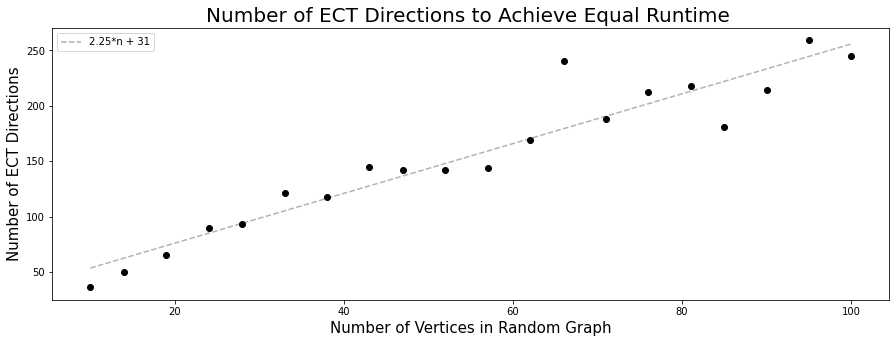

In [55]:
fig = plt.figure(figsize = (15,5))

plt.scatter(nrange, equald, color = 'black')
ax = plt.gca()

#linear fit
m,b = np.polyfit(nrange, equald, 1)
xlin = np.linspace(np.min(nrange), np.max(nrange), 100)
plt.plot(xlin, m*xlin+b, color = 'black', ls = '--', alpha=.3, label = f"{round(m,2)}*n + {round(b)}")

plt.legend()
plt.xlabel("Number of Vertices in Random Graph", size = 15)
plt.ylabel("Number of ECT Directions", size = 15)
plt.title("Number of ECT Directions to Achieve Equal Runtime ", size = 20)


# ax.set_aspect('equal', adjustable='box')

plt.savefig("./plots/runtime_equality.pdf")